# Logistic Regression
Within this activity, we're going to try to predict whether or not someone has diebetes (i.e. has diabetes means `Outcome = 1`) based on several numeric features. The dataset that we'll be working with consists of 8 columns and we'll be doing the following:
- Loading in the dataset
- Checking if there are any NaNs.
- Checking if there are any categorical variables and if so, one-hot encode them.
- Plot the distribution of BMI's for those with diabetes (Outcome=1) and those without (Outcome=0)
- Split the dataset into a training/testing set.
- Train the Logistic Regression Model
- Predict on the test set.

In [1]:
import pandas as pd

In [2]:
# Load in the dataset.
data = pd.read_csv("data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Are there any rows with NaN's? If so, delete them.
data = data.dropna(axis=0)

In [4]:
# Are there any categorical variables? If so, one-hot encode them?
# No categorical variables.

<Axes: xlabel='BMI', ylabel='Count'>

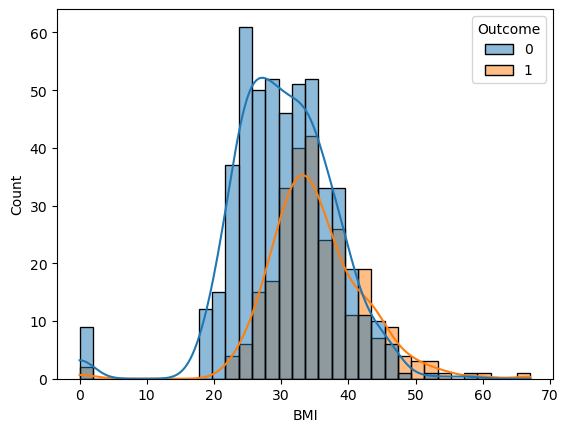

In [5]:
# Using Seaborn, plot the distribution of BMI's for those with diabetes (Outcome=1) and those without (Outcome=0)
import seaborn as sns

sns.histplot(
    data = data,
    x = "BMI",
    hue = "Outcome",
    kde=True
)

In [6]:
# Split the dataset into 80/20 training/testing split with a random state of 42 using only BMI.
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data["BMI"])
y= data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the model and then predict on the test set.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

In [8]:
# What is the accuracy of your predictions?
from sklearn.metrics import accuracy_score

print(f"Logistic Regression Accuracy Score: {accuracy_score(y_test, lr_predictions)}")

Logistic Regression Accuracy Score: 0.6558441558441559


In [9]:
# What are the probabilities of your predictions?
lr.predict_proba(X_test)

array([[0.62402449, 0.37597551],
       [0.58390449, 0.41609551],
       [0.69478911, 0.30521089],
       [0.80763858, 0.19236142],
       [0.71329953, 0.28670047],
       [0.53528132, 0.46471868],
       [0.86405777, 0.13594223],
       [0.62864584, 0.37135416],
       [0.68422131, 0.31577869],
       [0.63094778, 0.36905222],
       [0.75922189, 0.24077811],
       [0.61938044, 0.38061956],
       [0.69269142, 0.30730858],
       [0.63324377, 0.36675623],
       [0.74260649, 0.25739351],
       [0.64009521, 0.35990479],
       [0.54753744, 0.45246256],
       [0.70720421, 0.29279579],
       [0.74260649, 0.25739351],
       [0.41522113, 0.58477887],
       [0.73498579, 0.26501421],
       [0.66910236, 0.33089764],
       [0.56216777, 0.43783223],
       [0.64236655, 0.35763345],
       [0.57909913, 0.42090087],
       [0.58869394, 0.41130606],
       [0.80142845, 0.19857155],
       [0.87416171, 0.12583829],
       [0.34779562, 0.65220438],
       [0.70309877, 0.29690123],
       [0.

In [17]:
# Using the entire dataset, split your data, train a model, get the predictions and calculate the accuracy.
X = data.drop("Outcome", axis=1)
y= data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#lr = LogisticRegression()
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)
print(f"Logistic Regression Accuracy Score: {accuracy_score(y_test, lr_predictions)}")

Logistic Regression Accuracy Score: 0.7467532467532467


In [11]:
# Logistic Regression Challenging Question:
# Using the univariate case (i.e. only using BMI to predict outcome), if you were to increase the BMI by 1 unit, 
# how much will the probability increase/decrease such that someone has diabetes? 
# Note: This isn't as easy as Linear Regression and takes some math :) 
# Hint: Fix the initial BMI to be something such as 10 and see how the probability increases when you increase the BMI
# by 1.

X = pd.DataFrame(data["BMI"])
y= data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

In [12]:
import numpy as np

b0 = lr.intercept_
b1 = lr.coef_[0][0]

original_bmi = 10

numerator = np.exp(b0 + (b1 * original_bmi))
denominator = 1 + np.exp(b0 + (b1 * original_bmi))

print("Original Probability of Diabetes: ", numerator[0] / denominator[0])

Original Probability of Diabetes:  0.05334199799743317


In [13]:
numerator = np.exp(b0 + (b1 * original_bmi + 1))
denominator = 1 + np.exp(b0 + (b1 * original_bmi + 1))

print("New Probability of Diabetes: ", numerator[0] / denominator[0])

New Probability of Diabetes:  0.13282435678878227


In [14]:
# Logistic Regression Challenging Question:
# Is accuracy the best metric to use for this dataset? Why or why not? Hint: Think about the outcomes distribution.

# Answer: No, not necessarily since predicting all 0's for example, would result in a 500/(500 + 268) accuracy.